In [2]:
import torch
import torch.nn.functional as F

x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[0.0], [0.0], [1.0]])

class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)

    def forward(self, x):
        y_pred = F.sigmoid(self.linear(x))
        return y_pred
    
model = LogisticRegressionModel()

# 计算损失+构造优化器
criterion = torch.nn.BCELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# 训练循环
for epoch in range(1000):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    print(epoch, loss)

    # pytorch默认是累加梯度，不是覆盖之前的梯度
    # 所以要先清空，再反向传播
    optimizer.zero_grad() 
    loss.backward()
    optimizer.step()

print('w', model.linear.weight.item())
print('b', model.linear.bias.item())

c:\Users\wangfenglin\anaconda3\Lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


0 tensor(3.9042, grad_fn=<BinaryCrossEntropyBackward0>)
1 tensor(3.8194, grad_fn=<BinaryCrossEntropyBackward0>)
2 tensor(3.7368, grad_fn=<BinaryCrossEntropyBackward0>)
3 tensor(3.6566, grad_fn=<BinaryCrossEntropyBackward0>)
4 tensor(3.5786, grad_fn=<BinaryCrossEntropyBackward0>)
5 tensor(3.5031, grad_fn=<BinaryCrossEntropyBackward0>)
6 tensor(3.4300, grad_fn=<BinaryCrossEntropyBackward0>)
7 tensor(3.3593, grad_fn=<BinaryCrossEntropyBackward0>)
8 tensor(3.2912, grad_fn=<BinaryCrossEntropyBackward0>)
9 tensor(3.2256, grad_fn=<BinaryCrossEntropyBackward0>)
10 tensor(3.1626, grad_fn=<BinaryCrossEntropyBackward0>)
11 tensor(3.1021, grad_fn=<BinaryCrossEntropyBackward0>)
12 tensor(3.0442, grad_fn=<BinaryCrossEntropyBackward0>)
13 tensor(2.9887, grad_fn=<BinaryCrossEntropyBackward0>)
14 tensor(2.9359, grad_fn=<BinaryCrossEntropyBackward0>)
15 tensor(2.8854, grad_fn=<BinaryCrossEntropyBackward0>)
16 tensor(2.8375, grad_fn=<BinaryCrossEntropyBackward0>)
17 tensor(2.7919, grad_fn=<BinaryCrossEnt

In [7]:
x_test = torch.tensor([[6.0]])
y_test = model(x_test)
print('y_pred = ', y_test.data)

y_pred =  tensor([[0.9833]])


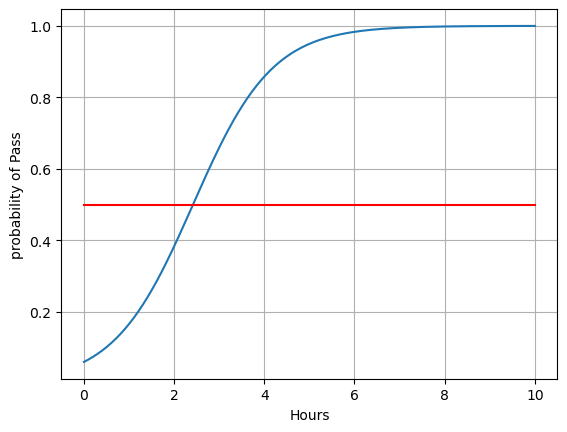

In [10]:
import numpy as np
import matplotlib.pyplot as plt 

x = np.linspace(0, 10, 200)
x_t = torch.Tensor(x).view((200, 1)) # 把数据变成200行1列的tensor
y_t = model(x_t)
y = y_t.data.numpy() # 转换成一维数组

plt.plot(x, y)
plt.plot([0, 10], [0.5, 0.5], c='r')
plt.xlabel('Hours')
plt.ylabel('probability of Pass')
plt.grid() # 绘制网格
plt.show() # 展示图形